In [ ]:
'''
Decide an MP Neuron to decide whether to play a sport based on three binary inputs:
Weather (0 for bad, 1 for good)
Equipment availability (0 for not available, 1 for available)
Physical condition (0 for not fit, 1 for fit)
We'll say the neuron will decide to play the sport (output 1) if at least two of these conditions are favorable.
'''

In [19]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [29]:

import random


dataset_size = 100

# Generate the dataset
dataset = []
for _ in range(dataset_size):
    weather = random.randint(0, 1)
    equipment = random.randint(0, 1)
    condition = random.randint(0, 1)
    
    favorable_conditions = weather + equipment + condition
    output = 1 if favorable_conditions >= 2 else 0
    
    # add to dataset
    dataset.append([weather, equipment, condition, output])




In [30]:
# Create a DataFrame from the dataset
df = pd.DataFrame(dataset, columns=['Weather', 'Equipment availability', 'Physical condition', 'Output'])

df

,Weather,Equipment availability,Physical condition,Output
0,0,1,0,0
1,1,1,1,1
2,0,0,1,0
3,1,1,0,1
4,1,0,0,0
...,...,...,...,...
95,1,0,0,0
96,1,0,1,1
97,0,0,0,0
98,0,1,0,0


In [9]:
# Segregate X (input features) and Y (output labels)
X = df[['Weather', 'Equipment availability', 'Physical condition']]  # Input features
Y = df['Output']  # Output labels

In [10]:
X.head()

,Weather,Equipment availability,Physical condition
0,1,1,1
1,0,1,1
2,0,1,1
3,1,1,0
4,0,1,0


In [11]:
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Output, dtype: int64

In [12]:
print(X.shape, Y.shape)

(100, 3) (100,)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [14]:
print(Y.shape, Y_train.shape, Y_test.shape)

(100,) (75,) (25,)


In [15]:
print(X.shape, X_train.shape, X_test.shape)

(100, 3) (75, 3) (25, 3)


In [17]:
X.describe()

,Weather,Equipment availability,Physical condition
count,100.000000,100.00000,100.00
mean,0.470000,0.57000,0.55
std,0.501614,0.49757,0.50
min,0.000000,0.00000,0.00
25%,0.000000,0.00000,0.00
50%,0.000000,1.00000,1.00
75%,1.000000,1.00000,1.00
max,1.000000,1.00000,1.00


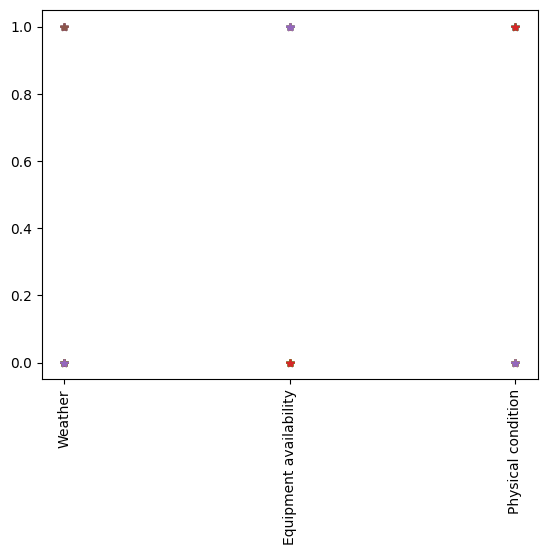

In [20]:
plt.plot(X_test.T, '*')
plt.xticks(rotation='vertical')
plt.show()

This shows the data is already binarized.

# Define MP neuron class

In [26]:
class MPNeuron:
    def __init__(self):
        # no need of any initialization
        pass
    

    def playOrNot(self, weather, equipment, condition):
        # Rule: If more than 2 condn favourable we will accept
        favorable_conditions = weather + equipment + condition
        return 1 if favorable_conditions >= 2 else 0

In [27]:
# Instantiate
model = MPNeuron()

In [28]:
# Train and evaluate the model using the training and testing sets
def eval(model, X, Y):
    predictions = []
    for _, row in X.iterrows():
        decision = model.playOrNot(row['Weather'], row['Equipment availability'], row['Physical condition'])
        predictions.append(decision)
    accuracy = sum(predictions == Y) / len(Y)
    return accuracy

train_accuracy = eval(model, X_train, Y_train)
test_accuracy = eval(model, X_test, Y_test)

# Use f string nottaion
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 1.0
Testing Accuracy: 1.0
